In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy.sparse import data
import seaborn as sb
from sklearn import ensemble
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

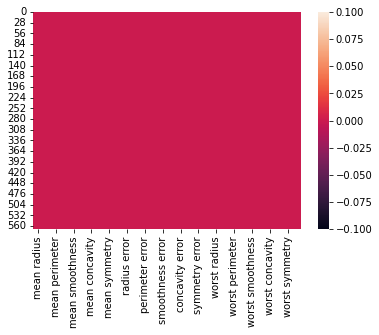

In [5]:
sb.heatmap(df.isnull())

In [33]:
X = df.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# decisiontree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9473684210526315

In [36]:
# naivebayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
clf_nb.score(X_test, y_test)

0.9298245614035088

In [37]:
# knn
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
clf_knn.score(X_test, y_test)

0.9122807017543859

In [38]:
# svm
clf_svm = SVC(probability=True, kernel='linear')
clf_svm.fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.956140350877193

In [39]:
# ann
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 50, epochs = 100)

In [41]:
score, acc = ann.evaluate(X_test, y_test,verbose=2, batch_size= 50)
print('test accuracy:', acc)

3/3 - 0s - loss: 0.7649 - accuracy: 0.4035 - 133ms/epoch - 44ms/step
test accuracy: 0.4035087823867798


In [42]:
predict_x=ann.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

4/4 [==============================] - 0s 4ms/step


In [43]:
predict_x = predict_x[:, 1]

In [44]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([[9.99977422e-01, 2.25779871e-05]])

In [45]:
clf.score(X_test, y_test)

0.9736842105263158

In [47]:
y_clf = clf.predict(X_test)

In [48]:
precision_score(y_test, y_clf)

0.9848484848484849

In [49]:
recall_score(y_test, y_clf)

0.9701492537313433

In [50]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_clf))

F1 Score: 0.977


In [51]:
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_clf.predict_proba(X_test)
nb_probs = clf_nb.predict_proba(X_test)
knn_probs = clf_knn.predict_proba(X_test)
svm_probs = clf_svm.predict_proba(X_test)
mlp_probs = clf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
mlp_probs = mlp_probs[:, 1]

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
dt_auc= roc_auc_score(y_test, dt_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc= roc_auc_score(y_test, svm_probs)
ann_auc = roc_auc_score(y_test, predict_x)
mlp_auc = roc_auc_score(y_test, mlp_probs)

In [54]:
print("Decision Tree: AUROC = %.3f" %(dt_auc))
print("Naive Bayes: AUROC = %.3f" %(nb_auc))
print("KNearest Neighbors: AUROC = %.3f" %(knn_auc))
print("Support Vector Machine: AUROC = %.3f" %(svm_auc))
print("ANN: AUROC = %.3f" %(ann_auc))
print("MLP: AUROC = %.3f" %(mlp_auc))

Decision Tree: AUROC = 0.645
Naive Bayes: AUROC = 0.544
KNearest Neighbors: AUROC = 0.500
Support Vector Machine: AUROC = 0.875
ANN: AUROC = 0.957
MLP: AUROC = 0.998


In [55]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nb_fpr,nb_tpr, _  = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _  = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ann_fpr, ann_tpr, _  = roc_curve(y_test, predict_x)
mlp_fpr, mlp_tpr, _  = roc_curve(y_test, mlp_probs)

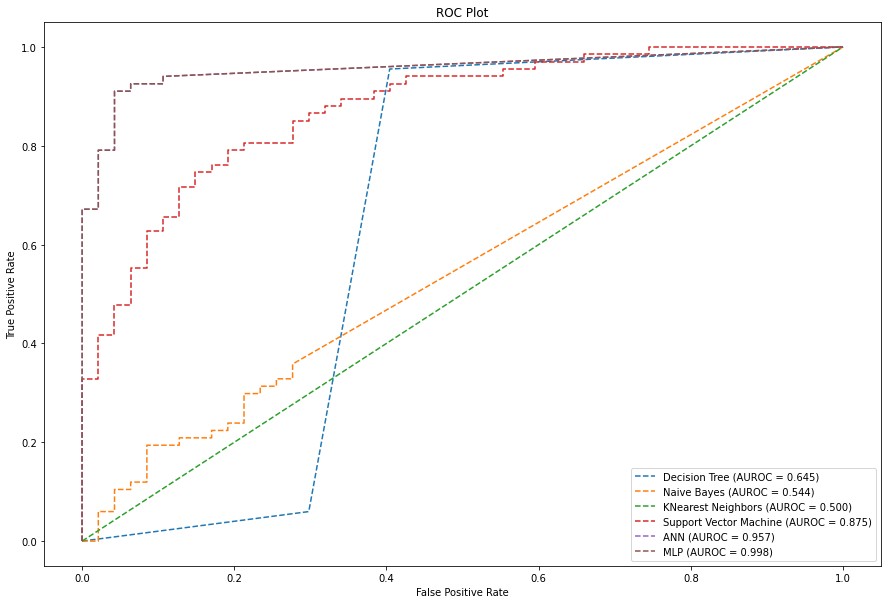

In [56]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label= 'Decision Tree (AUROC = %0.3f)' %dt_auc)
plt.plot(nb_fpr,nb_tpr, linestyle='--', label= 'Naive Bayes (AUROC = %0.3f)' %nb_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label= 'KNearest Neighbors (AUROC = %0.3f)' %knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label= 'Support Vector Machine (AUROC = %0.3f)' %svm_auc)
plt.plot(ann_fpr, ann_tpr, linestyle='--', label= 'ANN (AUROC = %0.3f)' %ann_auc)
plt.plot(ann_fpr, ann_tpr, linestyle='--', label= 'MLP (AUROC = %0.3f)' %mlp_auc)
plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()